## Test with a smaller map

In [23]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from matplotlib import cm
warnings.filterwarnings('ignore')

In [24]:
datas = pd.read_csv('./flickr_data.csv', sep=',', error_bad_lines=False)

b'Skipping line 1555: expected 16 fields, saw 17\nSkipping line 3691: expected 16 fields, saw 17\n'
b'Skipping line 74107: expected 16 fields, saw 18\nSkipping line 74108: expected 16 fields, saw 18\nSkipping line 75320: expected 16 fields, saw 17\nSkipping line 75323: expected 16 fields, saw 17\nSkipping line 78506: expected 16 fields, saw 17\nSkipping line 78516: expected 16 fields, saw 17\nSkipping line 78517: expected 16 fields, saw 17\nSkipping line 78518: expected 16 fields, saw 17\nSkipping line 78519: expected 16 fields, saw 17\nSkipping line 78520: expected 16 fields, saw 17\nSkipping line 80008: expected 16 fields, saw 17\nSkipping line 81821: expected 16 fields, saw 17\n'


In [25]:
datas.head()

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
0,22653655033,77161041@N00,45.768121,4.801776,"square,sierra,squareformat,iphoneography,insta...",Enfin. #instabeer #beer #chimay #apero,46,18,24,11,2015,46,18,24,11,2015
1,22884818287,113280318@N03,45.759700,4.842200,"square,squareformat,iphoneography,instagramapp...",https://www.facebook.com/PascalFrontiPhotograp...,3,17,24,11,2015,3,17,24,11,2015
2,23277598065,132999708@N08,46.027633,4.699855,NaN,compagnons_dev_arnas20 (1),0,15,7,11,2015,50,15,24,11,2015
3,22883485267,132999708@N08,46.027572,4.699966,NaN,compagnons_dev_arnas20 (3),1,15,7,11,2015,50,15,24,11,2015
4,23249102166,133835212@N03,45.699105,4.474932,"sunset,sky,cloud,sun,soleil,coucherdesoleil",Un soir dans les Monts du Lyonnais,20,20,31,8,2015,50,13,24,11,2015


In [26]:
datas.columns = datas.columns.str.replace(' ','')

In [27]:
print(datas.shape)
datas = datas.drop_duplicates()
print(datas.shape)

(83837, 16)
(15202, 16)


In [32]:
#Clean data outside the box
#long: 4.7821  - 4.8929
#lat : 45.7855  - 45.7261
print(datas.shape)
datas = datas[datas.long > 4.7821]
datas = datas[datas.long < 4.8929]
datas = datas[datas.lat > 45.7261]
datas = datas[datas.lat < 45.7855]
print(datas.shape)

(15202, 16)
(9687, 16)


In [34]:
BBox = ((datas.long.min(), datas.long.max(), datas.lat.min(), datas.lat.max()))
BBox

(4.782603, 4.890663, 45.726411, 45.785472)

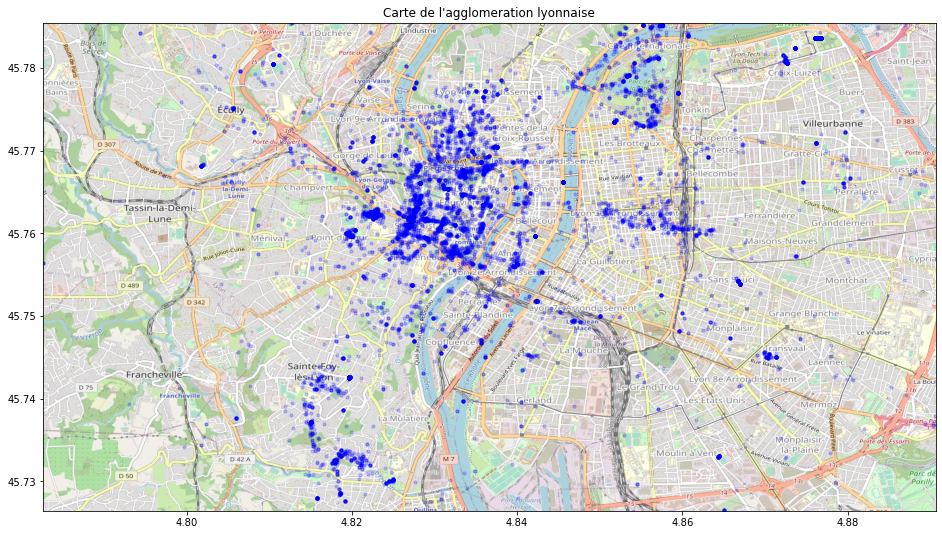

In [35]:
carte = plt.imread('./smaller_map.png')
fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(datas.long, datas.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Carte de l\'agglomeration lyonnaise')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(carte, zorder=0, extent = BBox, aspect= 'equal')

In [67]:
lat = datas.lat
long = datas.long
locations = pd.DataFrame({"lat":datas.lat, "long":datas.long})

dbscan = DBSCAN(eps=0.0005, min_samples=50)
clustering = dbscan.fit(locations)
locations['label'] = clustering.labels_
#print(len(clustering.labels_))

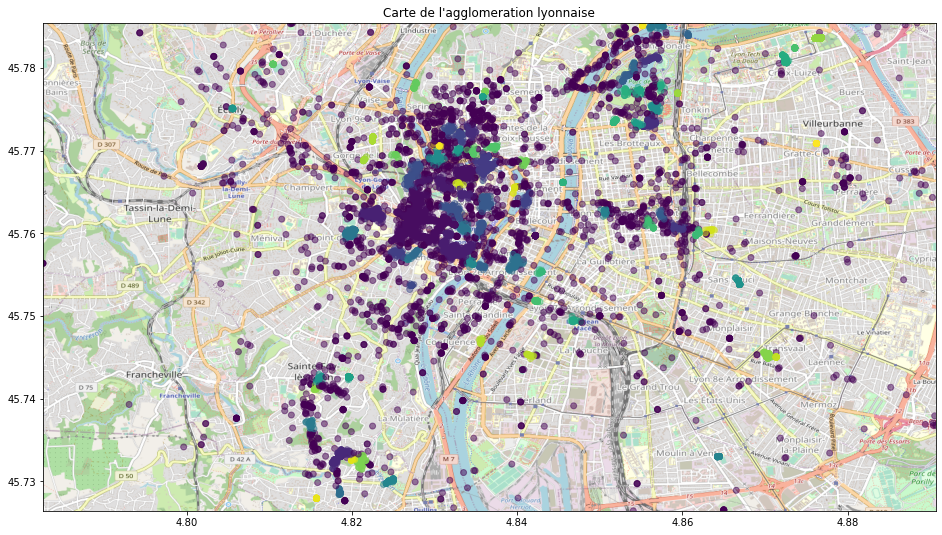

In [70]:
fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(datas.long, datas.lat, zorder=1, alpha= 0.5, c=clustering.labels_)
ax.set_title('Carte de l\'agglomeration lyonnaise')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(carte, zorder=0, extent = BBox, aspect= 'equal')

In [69]:
locations['label'].nunique()

88

In [57]:
locations.head()

,lat,long,label
0,45.768121,4.801776,-1
1,45.759700,4.842200,-1
5,45.763429,4.849875,-1
6,45.739289,4.814243,-1
7,45.762661,4.826900,1
